# Fig 4

In [3]:
import numpy as np
import sdeint
import matplotlib.pyplot as plt
#
lanewidth = 3.5
sigma = 0.1
theta = .01
###################

#################################################
#dY = f)Y * dt + G_Y * dW
def f_Y(x, t, sigma = sigma):
    return -.5*2*sigma**2*np.tan(x)/((np.tan(x)**2+1)**2)

def g_Y(x, t):
    return 1.0*sigma/(np.tan(x)**2+1)

#################################################
#--------------------------------------
#Z = [x,Y]
def f_Z(Z,t, sigma = sigma):
    tmp0 = theta*(-Z[0] - Z[1])
    tmp1 = -.5*2*lanewidth/np.pi*sigma**2*np.tan(Z[1]*np.pi/lanewidth)/((np.tan(Z[1]*np.pi/lanewidth)**2+1)**2)
    #return np.array([[tmp0, 0], [0, tmp1]])
    return np.array([tmp0, tmp1])
def g_Z(Z,t):
    tmp0 = 0
    tmp1 = 1.0*lanewidth/np.pi*sigma/(np.tan(Z[1]*np.pi/lanewidth)**2+1)
    return np.array([[0, 0], [0, tmp1]])
    #return np.array([[tmp0], [tmp1]])
    #return np.array([tmp0, tmp1])
#################################################

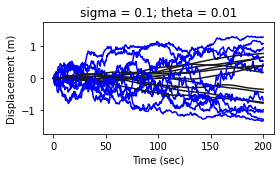

In [4]:
fig,ax = plt.subplots(figsize = (4,2.5))
tspan = np.linspace(0.0, 200, 400)
#
Z0 = np.array([.0, .0])
iters = 10
for iterr in range(iters):
    result = sdeint.itoint(f_Z, g_Z, Z0, tspan)
    ax.plot(tspan[:], result[:,0], color = np.array([.1, .1, .1]))
    ax.plot(tspan, result[:,1], 'b')

ax.set_title('sigma = '+str(sigma) + '; theta = '+str(theta))
ax.set_xlabel('Time (sec)')
ax.set_ylabel('Displacement (m)')
ax.set_ylim([-lanewidth/2, lanewidth/2]);
plt.tight_layout()
#plt.savefig(figspath + 'sigma_'+str(sigma)+'.jpg', dpi = 500)